# Table of Contents

    3 The Mandelbrot set 
        A.Classic Mandelbrot
        B. Colored Mandelbrot
        C. Histogram
        D. Link with the logistics equation 
        E. Time comparison for the two methods to create the Mandelbrot set
        

# The Mandelbrot set :

## Description of the Mandelbrot set : 

The Mandelbrot sets is named after Benoit Mandelbrot. It is mostly know for the pretty pictures it can produce, while being relatively easy to render.

The mandelbrot set has the characteristic properties of a fractal: In the set, most parts have self-similar  properties  and look like smaller-scale copies of the whole set, but not all the parts verify this property, as small slightly different versions of itself can be found at arbitrarily small scales.

We notice also that the little copies of the Mandelbrot set are all slightly different, mostly because of the thin threads connecting them to the main body of the set, that's why the Mandelbrot set is not strictly self-similar but it is quasi-self-similar.

The Mandelbrot set $\mathcal{M}$  is defined as :

$$ \mathcal{M}=\left\{ c\in\mathbb{C},\ \lim_{n\rightarrow +\infty} z_n <+\infty,\ \text{with } z_{n+1}=z_n^2+c,\ z_0=0\right\} $$

 


To draw the different plot, we need to import the following libraries as well as our package chaoseverywhere. 


In [ ]:
from mayavi import mlab
import sys
import os
import numpy as np
import chaoseverywhere as chaos
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(
    os.path.abspath('chaoseverywhere')) + (os.path.sep + '..')*2)

chaos.Mandelbrot_disp(0,0,2,t_max=150).disp_mandel()

### Some properties of the Mandelbrot set : 

 - If for a certain index $n_k$ $(\lvert Z_n \lvert)_n > 2$ so $Z_n$ 
is increasing from $n_k$ and tends towards $\infty$ .
 - The Mandelbros set is compact, symmetrical about the real axis and contains the closed disc  $D(0,\frac{1}{4})$.
 - Its intersection with the real axis is the segment $[–2, \frac{1}{4}]$.
 

## A.Classic Mandelbrot


The classical monochrome Mandelbrot is contained in the origin disk $𝐷((0,0),2)$, to compute it we iterate the following formula : 
$$ z_{n+1}=z_n^2+c,\ c\in\mathbb{C}, \text{with : }z_0=0\in\mathbb{C} $$



We create the classical monochrome Mandelbrot set by : 

In [ ]:
chaos.Mandelbrot_disp(0,0,2,t_max=150).disp_mandel()


In this graph, the big shape that almost looks like a circle is a cardioid

The circle on the left of the cardioid is itself surrounded by circles of different sizes repeats throughout the fractal and this, in an infinite way.



More interesting pictures can be obtained by using colors that are based on the iteration number n

## B. Colored Mandelbrot

To study the mandelbrot more deeply, and therefore have the colorful mandelbrot, we have two methods : 
The first one consiste to add to the previous study the speed for which the other points diverge, and assign a specific color to each speed.
As noted before, the mandelbrot set is contained in the disc $𝐷((0,0),2)$ we will iterate the same formula as for the monochrom mandebrot, adding the following condtion:

$$ \forall\ z \in\mathbb{C},\ |z|^2=z\bar{z}. $$
And  compare it with $2^2$


In order to visualize it, we use : 

In [ ]:
mandel = chaos.Mandelbrot_disp(0,0,2,t_max=150).mandel_loop(go_up=False)
fig, ax = plt.subplots()
pict = ax.imshow(mandel, cmap='cool')
fig.colorbar(pict, extend='both')
plt.show()

The problem with the first method is that some points take a lot of iterations to make the sequence diverge, it's due to the choice of the iteration number which doesn't always create the smoothest jumps (these are the points close to the border), which prevents the contracste from being visible.

To correct that problem, we have several choices. Among them, we can take $\frac{1}{2+n}$ where 𝑛 is the current iteration of the sequence.

The difference in the code resides in the function mandel_loop, where we will consider the parameter (go_up = true)
 

We visualise it by : 

In [ ]:
mandel = chaos.Mandelbrot_disp(0,0,2,t_max=150).mandel_loop(go_up=True)
fig, ax = plt.subplots()
pict = ax.imshow(mandel, cmap='cool')
ax.axvline(x=200, color='black')
fig.colorbar(pict, extend='both')
plt.show()

## C. Histogram

To better visualize the distribution of colors on the colored Mandelbrot, we draw this histogram:

In [ ]:
mandel = Mandelbrot_disp(-.5,0,1.5).mandel_loop()
data = np.array(np.unique(mandel,return_counts=True)).T
plt.style.use('ggplot')
plt.figure()
plt.bar(data[:,0],data[:,1], width=.15, align= 'edge')
plt.show()


## D. Link with the logistics equation : 

The parameters of M, in the real interval $[–2, 1/4]$, can be mached bijectively with those of the logistic equation: \\  \\ 
${\displaystyle z\mapsto \lambda z(1-z),\quad \lambda \in [1,4],}z\mapsto \lambda z(1-z),\quad \lambda\in[1,4],$ correspondence being given by : $ {\displaystyle c={\frac {\lambda }{2}}\left(1-{\frac {\lambda }{2}}\right).}$

Let's remember that the logistic sequence is a sequence whose recurrence is not linear, it is written in the form:

   $$ \begin{array}{ll}
        x_{n+1}= r x_n(1-x_n) , x_0 \in [0,1] &  \\
         r \in [0,4] & 
    \end{array}$$

To ensure that $x$ remains in $ [0,1] $, the behavior of the sequence will depend on r:


 - If $ r \in [0,1] $ The population goes out regardless of the starting population.
 
 - if $ r \in [1,3]$  The population stabilizes around $ \frac{r -1}{r} $
  
 - if $ r \in  [3,3.57]$ The population oscillates between the powers of 2.
 
 - if $ r \geq 3.57 $ we get the $\textbf{chaos}$

## E. Time comparison for the two methods to create the Mandelbrot set

To create the mandelbrot set we used two methods : Mandelbrot and Mandel_loop, we will study the differance between the two methods  by graphing the relationship between the time used by the two method to create the Mandelbrot set and the number of iterations of the sequences 


In [ ]:
import os
import sys
chaoseverywhere = os.path.abspath(os.path.join('..','..'))
if chaoseverywhere not in sys.path:
    sys.path.append(chaoseverywhere)
import chaoseverywhere as chaos
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rc
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True, # possibly set False if no Latex install on your machine
          'figure.figsize': (10, 7),
          'font.family' : 'sans-serif'}
plt.rcParams.update(params)
rc('animation', html='html5')

In [2]:
import patsy
import numpy as np
import pandas as pd  
import statsmodels.api as sm
import time
import statsmodels.formula.api as smf

In [14]:
df = pd.read_csv('data.txt', sep=",", header=None, names=['nb_iter', 'mandel_loop', 'mandelbrot'])
df.head()

,nb_iter,mandel_loop,mandelbrot
0,10,0.187970,0.166974
1,30,0.519807,0.365940
2,50,0.805821,0.656944
3,70,1.141186,0.907765
4,90,1.384899,1.169816


In [15]:
reg_loop = smf.ols('mandel_loop ~ nb_iter', data=df).fit()
reg_loop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            mandel_loop   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     355.2
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.76e-15
Time:                        09:24:29   Log-Likelihood:                -26.241
No. Observations:                  25   AIC:                             56.48
Df Residuals:                      23   BIC:                             58.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2346      0.288     -0.813      0.424      -0.831       0.362
nb_iter        0.0188      0.001     18.846      0.000       0.017       0.021
==============================================================================
Omnibus:                       27.502   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.084
Skew:                           2.296   Prob(JB):                     5.97e-11
Kurtosis:                       7.911   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
reg = smf.ols('mandelbrot ~ nb_iter', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mandelbrot   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     650.1
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           2.29e-18
Time:                        09:24:43   Log-Likelihood:                -14.793
No. Observations:                  25   AIC:                             33.59
Df Residuals:                      23   BIC:                             36.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2800      0.182     -1.535      0.139      -0.657       0.097
nb_iter        0.0161      0.001     25.497      0.000       0.015       0.017
==============================================================================
Omnibus:                        2.298   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.773
Skew:                           0.642   Prob(JB):                        0.412
Kurtosis:                       2.765   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


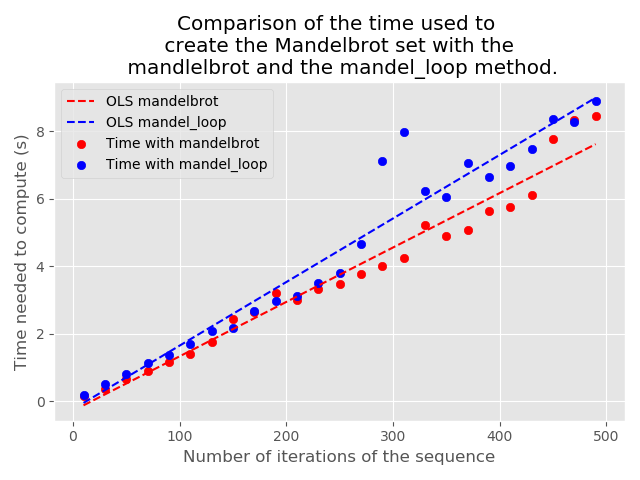

In [18]:
plt.style.use('ggplot')
plt.figure(1)
plt.scatter(df['nb_iter'], df['mandelbrot'], label='Time with mandelbrot', color='red')
plt.plot(df['nb_iter'], reg.predict(df), '--', label='OLS mandelbrot', color='red')
plt.scatter(df['nb_iter'], df['mandel_loop'], label='Time with mandel_loop', color='blue')
plt.xlabel('Number of iterations of the sequence')
plt.ylabel('Time needed to compute (s)')
plt.plot(df['nb_iter'], reg_loop.predict(df), '--', label='OLS mandel_loop', color='blue')
plt.legend()
plt.title("Comparison of the time used to \n create the Mandelbrot set with the \n mandlelbrot and the mandel_loop method.")
plt.tight_layout()

Now we compare the time required to create the mandebrot set using the mandelbrot and mandel_loop methods.

For a number of iterations between 0 and 250, we notice that the behavior of the two curves is almost identical, the points are closely juxtaposed with higher values for the mandel_loop method, the progression is done linearly, and therefore for a number of iterations between 0 and 250 iterations. The duration is between 0 and 4 seconds.

For a number of iterations between 250 and 450, the difference between the two methods begins to become visible. Indeed in this interval the difference between the two curves varies between 0.8 and 1.3 seconds, 
In this interval the compilation time is between 4 and 6 seconds for the mandelbrot method, 
and between 4 and 8 seconds for the mandel_loop method. 
We also note the presence of atypical points for the mandel_loop method (around 300 iterations).


For a number of iterations between 450 and 500, the values of the two curves approximate and the compilation time is between 8 and 9 seconds.

In [3]:
from mayavi import mlab
mlab.init_notebook()

Notebook initialized with ipy backend.


In [4]:
def transform(z,c):
    return(np.cos(z)+1/c)

In [21]:
mandel = chaos.Mandelbrot_disp(0,0,2,800, 700).mandel_transform(FUN=transform)
#s = mlab.surf(mandel, colormap='bone', warp_scale='auto', vmax=1.5)
#s

<IPython.core.display.Javascript object>


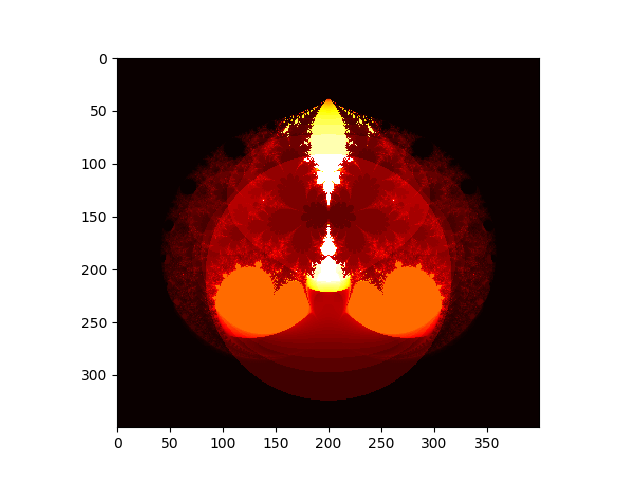

In [27]:
plt.figure()
plt.imshow(mandel[200:550:,150:550], cmap='hot')
plt.show()